# Normality test

In this notebook, I go through several normality tests.   
 

The goal here is to test whether a given distribution is normal.   

The tests/steps done are:   
1. [Standarize data](#section1)
2. [Q - Q test](#section2)   
3. [Skew and kurtosis test](#section3)   
5. [Kolmogorov-Smirnov test](#section4)   
6. [$\chi^2$ test](#section5)

<a id='section1'></a>
## Standarize data
For this notebook, I use a dataset of documents, containing the document id, and its readability score.   
The readability score tells how complex is a text to be read.   
The contents of the dataset are not important here.   


In [1]:
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import pandas as pd

# Read dataset:
df = pd.read_csv('../datasets/db-readability-length.csv', index_col=0)
del df['Length']
X = df.values[:,0]
df.head()

,Readability
post id,
0,11.6
1,6.9
2,6.3
3,4.0
4,9.2


In [2]:
# Standarize data
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = np.sort(X)

/Users/rangel/anaconda3/envs/cdips2017/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/rangel/anaconda3/envs/cdips2017/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


For comparison, I also get random normal distributions A and B.

In [3]:
# Get also a normally distributed random sample:
from scipy.stats import norm

# Get random samples
n = len(X)

# Get random numbers, normaly distributed
A = norm.rvs(size=n)
B = norm.rvs(size=n)
# Sort data
A = np.sort(A)
B = np.sort(B)

# Sample with different means
C = norm.rvs(loc=8, scale=10, size=n)
C = np.sort(C)

<a id='section2' ></a>

## Q - Q test   
This is a visual test to tell whether two distributions are similar.   
We plot the quartiles a given distribution vs. those of another distribution.  
In this case, I compare vs. a normal distribution.  

In [4]:
def get_quartiles(X,Y):
    # Get quartiles, 100 of them
    Q1 = []; Q2=[]
    nq = 100
    n1 = len(X)
    n2 = len(Y)
    for i in range(nq):
        j1 = int(i * n1/nq)
        j2 = int(i * n2/nq)
        # quartiles for the two distributions will be stored in X and Y respectively
        Q1.append(X[j1])
        Q2.append(Y[j2])
    return Q1, Q2

def plot_q_q(Q1,Q2):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    line1, = ax.plot(Q1, Q1, '--', linewidth=2,
                 label='')
    line2, = ax.plot(Q1,Q2, linestyle = 'dotted', linewidth = 4,
                 label='Q-Q')
    #ax.legend(loc='lower right')
    ax.set_title('Q - Q plot')
    ax.set_ylabel('Distribution 2')
    ax.set_xlabel('Distribution 1')
    plt.show()

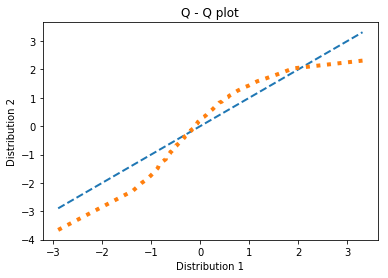

In [5]:
Q1, Q2 = get_quartiles(X,A)
plot_q_q(Q1,Q2)


The above distribution is far from normal, let's do the same test with a distribution that we know is normal:

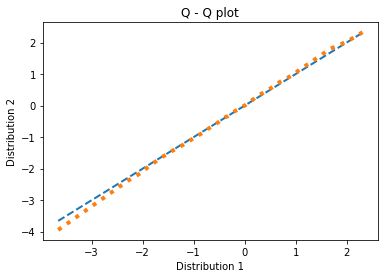

In [6]:
Q1, Q2 = get_quartiles(A,B)
plot_q_q(Q1,Q2)


<a id='section3'></a>
## Skew and Kurtosis test

Here I use the scipty stats implementation of the Ficher skew S and kurtosis K tests.   
We want to know if skew and kurtosis of our sample differ significantly from those of a normal distribution.   

### Skew test:
$H_0$: skew = 0   
$H_1$: skew $\neq$ 0

### Kurtosis test
$H_0$: kurtosis = 0   
$H_1$: kurtosis $\neq$ 0   

### p-values   
We can then obtain the z-scores using:    
$z_\mathrm{skewness} = \frac{S - 0}{\mathrm{SE}_\mathrm{skewness}}$

$z_\mathrm{kurtosis} = \frac{K - 0}{\mathrm{SE}_\mathrm{kurtosis}}$

The standard error for skewness and kurtosis can be obtained in any statistics package. Next, I use the implementation of numpy to get the p-values directly.

In [7]:
from scipy import stats

# Test our initial distribution
printmd('Skew and Kurtosis tests for a random distribution')
#print(stats.skewtest(X))
print('Normal skew test teststat     = %6.3f pvalue = %6.4f' % stats.skewtest(X))
print('Normal kurtosis test teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(X))
printmd('**Conclusion** The pvalue for both tests are zero, meaning that we can reject $H_0$\n')

printmd('Skew and Kurtosis tests for a normal random distribution')
print('Normal skew test teststat     = %6.3f pvalue = %6.4f' % stats.skewtest(A))
print('Normal kurtosis test teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(A))
printmd('**Conclusion** The pvalue for both tests are $>$ 0.05, so we accept $H_0$\n')



Skew and Kurtosis tests for a random distribution

Normal skew test teststat     = 57.478 pvalue = 0.0000
Normal kurtosis test teststat = 38.013 pvalue = 0.0000


**Conclusion** The pvalue for both tests are zero, meaning that we can reject $H_0$


Skew and Kurtosis tests for a normal random distribution

Normal skew test teststat     =  0.645 pvalue = 0.5187
Normal kurtosis test teststat =  0.612 pvalue = 0.5406


**Conclusion** The pvalue for both tests are $>$ 0.05, so we accept $H_0$


<a id='section4'></a>
## Kolmogorov-Smirnov test   


In [8]:
stats.ks_2samp(X, A)

Ks_2sampResult(statistic=0.14009533898305093, pvalue=8.5801441908164043e-33)

<a id='section5'></a>

## Chi-square test

Also called "Goodness of fit test".   
This is also used to test if two distributions are consistent.   


The test statistic (CV) is computed as    

$\chi^2 = \sum_i (O_i - E_i)^2/E_i$

where $O_i$ and $E_i$ are observed and expected frequency counts. 

after computing CV and degrees of freedom ($= n - 1$), we use the chi-square calculator to get the probability of P(chi2 $\leq$ CV) http://stattrek.com/online-calculator/chi-square.aspx

**Note** $\chi^2$ is the ratio between non negative values, so we need to shift our data to the positive scale before doing chi-square tests.

In [9]:
# Shift all matrices to take positive values:
# Here I just shift the arrays to start at 0

eta=0.001 #small number to avoid numerical problems

A = A - A.min() + eta
B = B - B.min() + eta
C = C - C.min() + eta
X = X - X.min() + eta


In [10]:
# Let's compute the statistic:   
cv = np.sum( ( X - A )**2 / A )
df = len(X)-1
print("chi2 statistic",cv, "DF ", df)

crit_95 = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df)   # *

print("Critical value for 95% confidence",crit_95)


p_value = float(1.0 - stats.chi2.cdf(x=cv, df=df))
print("P value %12.6f" % p_value)

printmd("The corresponding P($\,\chi^2 \leq $ CV) = 1, hence we accept $H_0$")
printmd("Remember that if test statistic is larger than the critical value, then we reject the null hypothesis.")
# We can also use scipy:
#scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

print(stats.chisquare(f_obs = X,f_exp = A) )

printmd("Now lets compare a normal distribution to another with a shifted mean value")
stats.chisquare(f_obs = A,   # Array of observed counts
                f_exp = C)   # Array of expected counts

chi2 statistic 809.515711991 DF  3775
Critical value for 95% confidence 3919.05050622
P value     1.000000


The corresponding P($\,\chi^2 \leq $ CV) = 1, hence we accept $H_0$

Remember that if test statistic is larger than the critical value, then we reject the null hypothesis.

Power_divergenceResult(statistic=809.51571199108901, pvalue=1.0)


Now lets compare a normal distribution to another with a shifted mean value

Power_divergenceResult(statistic=86635.923704313725, pvalue=0.0)

## Checking chi-square test

Here I reproduce the test in   
http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP

In [11]:

#http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP
E=np.array([30,60,10])
O=np.array([50,45,5])

cv = np.sum((O-E)**2/E)
print(cv)
df=2
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df)   # *


print("Critical value for 95% confidence",crit)

p_value = float(1.0 - stats.chi2.cdf(x=cv, df=df))
print("P value %12.6f" % p_value)

19.5833333333
Critical value for 95% confidence 5.99146454711
P value     0.000056
